In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
real_news=pd.read_csv('True.csv')
fake_news=pd.read_csv('Fake.csv')

In [3]:
real_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Visualizing 

In [5]:
real_news['Isfake']=0
fake_news['Isfake']=1

In [6]:
df=pd.concat([real_news,fake_news])

In [7]:
df.describe()

,Isfake
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.shape

(44898, 5)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

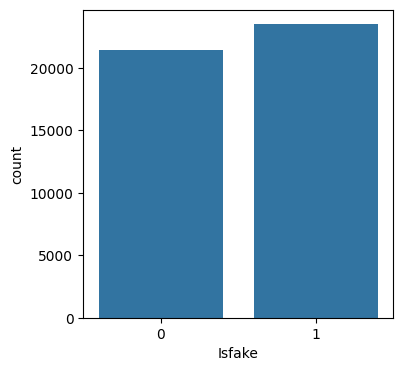

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["Isfake"])
plt.show()

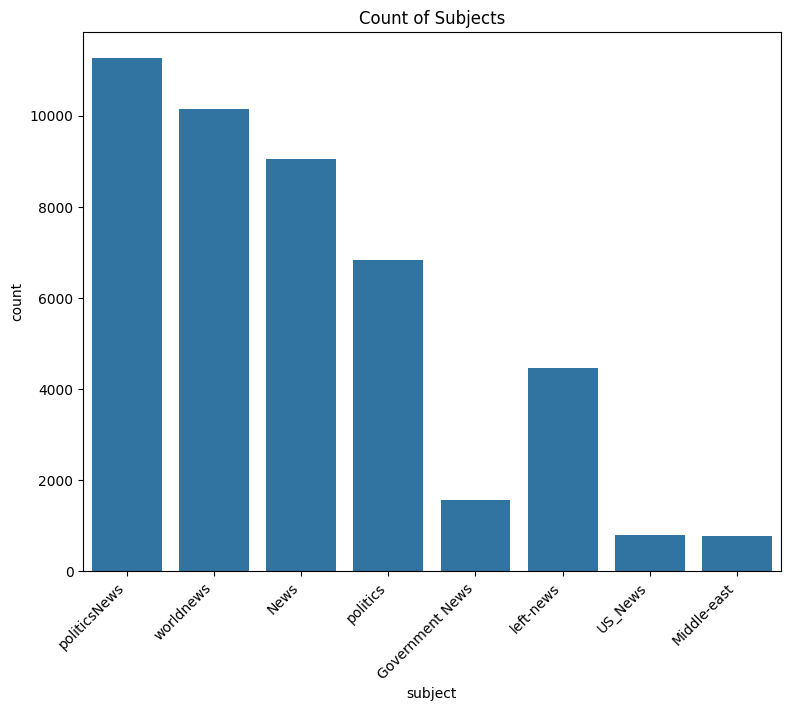

In [11]:
plt.figure(figsize=(9, 7))
sns.countplot(x=df["subject"])
plt.xticks(rotation=45, ha='right')
plt.title('Count of Subjects')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Isfake   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
df.size

224490

In [14]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Isfake     0
dtype: int64

In [15]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Isfake'], dtype='object')

# Pre-processing 

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
port_stem=PorterStemmer()
port_stem

<PorterStemmer>

In [18]:
import re,string
from string import punctuation
stop_words=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop_words.update(punctuation)
from bs4 import BeautifulSoup

In [19]:
def string_html(text):
    soup=BeautifulSoup(text,"html.parser")
    return soup.get_text()

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

def remove_URL(text):
    return re.sub(r'http\S+','',text)

def remove_stopwords(text):
    final_text=[]
    for i in text.split():
        if i.strip().lower() not in stop_words:
            final_text.append(i.strip())
    return " ".join(final_text)

def clean_text_data(text):
    text=string_html(text)
    text=remove_square_brackets(text)
    text=remove_stopwords(text)
    text=remove_URL(text)
    return text

In [20]:
df['text']=df['text'].apply(clean_text_data)

In [21]:
from wordcloud import WordCloud

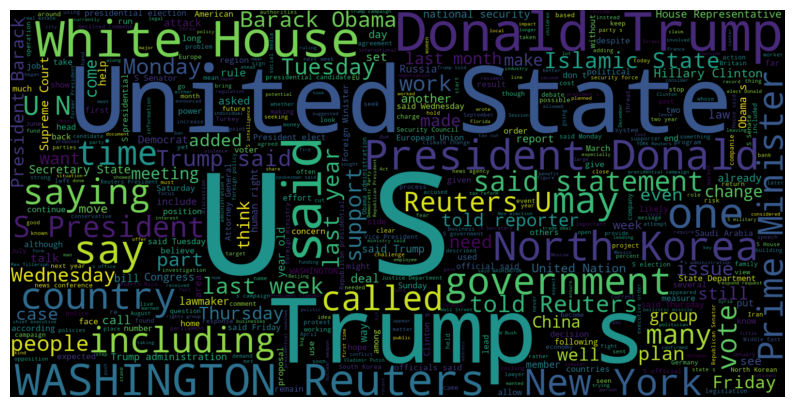

In [22]:
plt.figure(figsize=(10,10))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(df[df.Isfake==0].text))
plt.axis("off")
plt.imshow(wc,interpolation='bilinear')

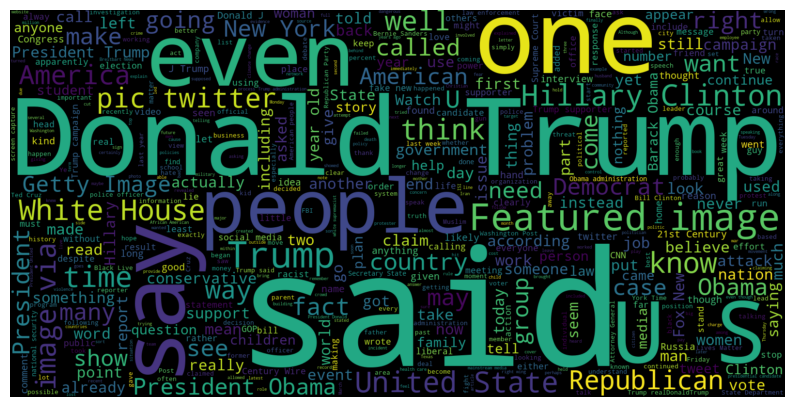

In [23]:
plt.figure(figsize=(10,10))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(df[df.Isfake==1].text))
plt.axis("off")
plt.imshow(wc,interpolation='bilinear')

In [24]:
x=df['text']
y=df['Isfake']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [27]:
x_train.shape
x_test.shape                                                                                                                      

(8980, 108022)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report,roc_curve, auc
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Classification

## LinearSVC

In [29]:
from sklearn.svm import LinearSVC
linearsvc=LinearSVC()
linearsvc.fit(x_train,y_train)
y_pred_1 = linearsvc.predict(x_test)

/Users/nevin/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [30]:
accuracy = accuracy_score(y_test, y_pred_1)
confusion = confusion_matrix(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
precision = precision_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)
r_squared = r2_score(y_test, y_pred_1)
mae = mean_absolute_error(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy:  0.995879732739421
Confusion Matrix: 
 [[4287   17]
 [  20 4656]]
Recall:  0.9957228400342173
Precision:  0.9963620800342392
F1 Score:  0.9960423574713874
R-squared score: 0.9834905997882091
Mean Absolute Error: 0.004120267260579065
Mean Squared Error: 0.004120267260579065


Text(0.5, 0, 'Predicted label')

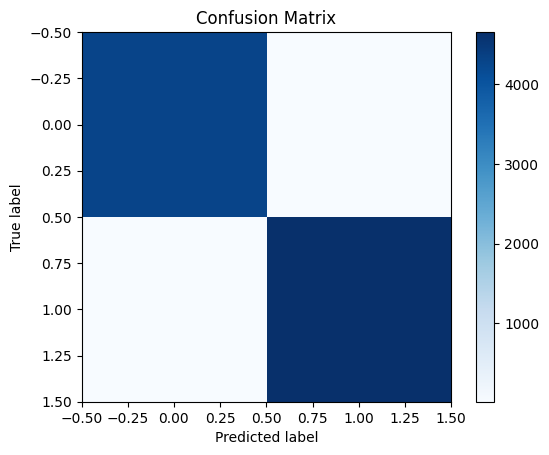

In [31]:
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred_2=decision_tree.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred_2)
confusion = confusion_matrix(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)
r_squared = r2_score(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy:  0.9953229398663697
Confusion Matrix: 
 [[4281   23]
 [  19 4657]]
Recall:  0.9959366980325064
Precision:  0.9950854700854701
F1 Score:  0.9955109020949123
R-squared score: 0.9812595997595887
Mean Absolute Error: 0.004677060133630289
Mean Squared Error: 0.004677060133630289


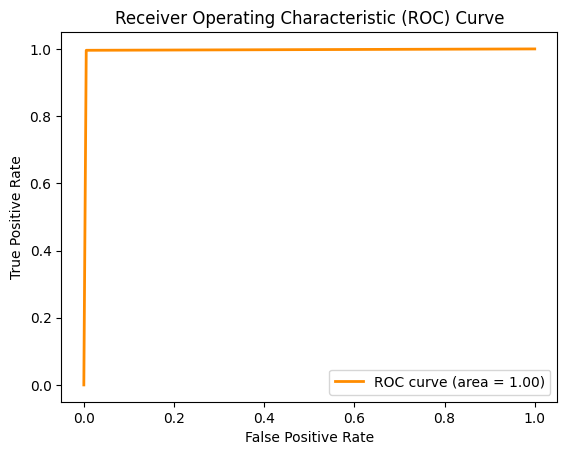

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred_3=logistic_regression.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_3)
confusion = confusion_matrix(y_test, y_pred_3)
recall = recall_score(y_test, y_pred_3)
precision = precision_score(y_test, y_pred_3)
f1 = f1_score(y_test, y_pred_3)
r_squared = r2_score(y_test, y_pred_3)
mae = mean_absolute_error(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy:  0.9897550111358575
Confusion Matrix: 
 [[4260   44]
 [  48 4628]]
Recall:  0.9897348160821214
Precision:  0.990582191780822
F1 Score:  0.9901583226358579
R-squared score: 0.9589495994733847
Mean Absolute Error: 0.010244988864142539
Mean Squared Error: 0.010244988864142539


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred_4=random_forest.predict(x_test)


In [38]:
accuracy = accuracy_score(y_test, y_pred_4)
confusion = confusion_matrix(y_test, y_pred_4)
recall = recall_score(y_test, y_pred_4)
precision = precision_score(y_test, y_pred_4)
f1 = f1_score(y_test, y_pred_4)
r_squared = r2_score(y_test, y_pred_4)
mae = mean_absolute_error(y_test, y_pred_4)
mse = mean_squared_error(y_test, y_pred_4)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Accuracy:  0.9932071269487751
Confusion Matrix: 
 [[4280   24]
 [  37 4639]]
Recall:  0.992087254063302
Precision:  0.9948530988633927
F1 Score:  0.9934682514187815
R-squared score: 0.9727817996508311
Mean Absolute Error: 0.006792873051224944
Mean Squared Error: 0.006792873051224944


## Gradient Boost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)
y_pred_7 = gradient_boosting.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_7)
confusion = confusion_matrix(y_test, y_pred_7)
recall = recall_score(y_test, y_pred_7)
precision = precision_score(y_test, y_pred_7)
f1 = f1_score(y_test, y_pred_7)
r_squared = r2_score(y_test, y_pred_7)
mae = mean_absolute_error(y_test, y_pred_7)
mse = mean_squared_error(y_test, y_pred_7)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("R-squared score:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Accuracy:  0.9937639198218263
Confusion Matrix: 
 [[4286   18]
 [  38 4638]]
Recall:  0.9918733960650128
Precision:  0.9961340206185567
F1 Score:  0.9939991427346764
R-squared score: 0.9750127996794515
Mean Absolute Error: 0.0062360801781737195
Mean Squared Error: 0.0062360801781737195


## Naive Bayes

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

batch_size = 1000  # Set the batch size according to your available memory

# Convert and process the data in batches
for i in range(0, x_train.shape[0], batch_size):
    x_train_batch = x_train[i:i+batch_size].toarray()
    y_train_batch = y_train[i:i+batch_size]
    naive_bayes.partial_fit(x_train_batch, y_train_batch, classes=np.unique(y_train))

# Predict using the dense test data
y_pred_nb = []

for i in range(0, x_test.shape[0], batch_size):
    x_test_batch = x_test[i:i+batch_size].toarray()
    y_pred_nb.extend(naive_bayes.predict(x_test_batch))


/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_batch = y_train[i:i+batch_size]
/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_batch = y_train[i:i+batch_size]
/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype

/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_batch = y_train[i:i+batch_size]
/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_batch = y_train[i:i+batch_size]
/var/folders/03/y4qhq5xs33g4178k3mnj79br0000gn/T/ipykernel_39651/497027725.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype

In [41]:
accuracy = accuracy_score(y_test, y_pred_nb)
confusion = confusion_matrix(y_test, y_pred_nb)
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", confusion)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  0.8555679287305122
Confusion Matrix: 
 [[3799  505]
 [ 792 3884]]
Recall:  0.9918733960650128
Precision:  0.9961340206185567
F1 Score:  0.9939991427346764


In [44]:
def output_label(n):
  if n==0:
    return "It is a True News"
  elif n==1:
    return "It is a Fake News"

def manual_testing(df):
  testing_news={"text": [df]}
  new_def_test=pd.DataFrame(testing_news)
  new_def_test["text"]=new_def_test["text"].apply(clean_text_data)
  new_x_test=new_def_test["text"]
  new_xv_test=vect.transform(new_x_test)
  y_pred_7 = gradient_boosting.predict(new_xv_test)
  y_pred_4=random_forest.predict(new_xv_test)
  y_pred_3=logistic_regression.predict(new_xv_test)
  y_pred_2=decision_tree.predict(new_xv_test)
  y_pred_1 = linearsvc.predict(new_xv_test)
  return "\n\nLR Prediction: {}  \n Rf Prediction: {}  \n gb Prediction: {}  \ndt Prediction: {}  \n lsvc Prediction: {} ".format(output_label(y_pred_1[0]),output_label(y_pred_2[0]),output_label(y_pred_3[0]),output_label(y_pred_4[0]),output_label(y_pred_7[0]))

news_article=str(input())
manual_testing(news_article)


Scientists Discover New Species of Giant Squid Living in New York City Sewers,"A team of scientists from the New York Marine Biology Institute claims to have made a groundbreaking discovery right beneath the streets of New York City. After months of research and exploration, they have found evidence of a new species of giant squid living in the city's sewer system. According to Dr. Emily Johnson, the lead researcher on the project, the newly discovered squid species is significantly larger than any known species of squid, with tentacles measuring up to 30 feet long. The discovery has sparked excitement among marine biologists worldwide, as it challenges previous notions about the habitats and behaviors of these deep-sea creatures. Dr. Johnson and her team are now planning further expeditions to study the behavior and ecological impact of these giant squids in the urban environment


'\n\nLR Prediction: It is a Fake News  \n Rf Prediction: It is a Fake News  \n gb Prediction: It is a Fake News  \ndt Prediction: It is a Fake News  \n lsvc Prediction: It is a Fake News '